In [1]:
# Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
# Load csv
df = pd.read_csv('../data/raw/data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
#Return on Assets ROA Beneficio/Activos. NET Value per share.

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
df.corr(numeric_only=True)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import pandas as pd

def find_highly_correlated_pairs(df, threshold=0.95):
    """
    Encuentra pares de variables numéricas altamente correlacionadas entre sí (positiva o negativa).
    
    Parámetros:
    - df: DataFrame de pandas
    - threshold: valor absoluto mínimo para considerar una correlación como alta (ej: 0.95)
    
    Devuelve:
    - Lista de tuplas: (variable_1, variable_2, correlación)
    """
    corr_matrix = df.corr(numeric_only=True)
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]

            if abs(corr_value) >= threshold:
                correlated_pairs.append((var1, var2, corr_value))

    return sorted(correlated_pairs, key=lambda x: -abs(x[2]))


In [8]:
pares = find_highly_correlated_pairs(df, threshold=0.9)
for var1, var2, corr in pares:
    print(f"{var1} <--> {var2} | Correlación: {corr:.3f}")


 Current Liabilities/Liability <-->  Current Liability to Liability | Correlación: 1.000
 Current Liabilities/Equity <-->  Current Liability to Equity | Correlación: 1.000
 Debt ratio % <-->  Net worth/Assets | Correlación: -1.000
 Operating Gross Margin <-->  Gross Profit to Sales | Correlación: 1.000
 Net Value Per Share (A) <-->  Net Value Per Share (C) | Correlación: 1.000
 Operating Gross Margin <-->  Realized Sales Gross Margin | Correlación: 1.000
 Realized Sales Gross Margin <-->  Gross Profit to Sales | Correlación: 1.000
 Net Value Per Share (B) <-->  Net Value Per Share (A) | Correlación: 0.999
 Net Value Per Share (B) <-->  Net Value Per Share (C) | Correlación: 0.999
 Operating Profit Per Share (Yuan ¥) <-->  Operating profit/Paid-in capital | Correlación: 0.999
 After-tax Net Profit Growth Rate <-->  Regular Net Profit Growth Rate | Correlación: 0.996
 Pre-tax net Interest Rate <-->  Continuous interest rate (after tax) | Correlación: 0.994
 ROA(C) before interest and dep

In [10]:
df[" Net Income Flag"].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 6819 entries, 0 to 6818
Series name:  Net Income Flag
Non-Null Count  Dtype
--------------  -----
6819 non-null   int64
dtypes: int64(1)
memory usage: 53.4 KB


In [11]:
df[" Net Income Flag"].drop_duplicates()

0    1
Name:  Net Income Flag, dtype: int64

In [12]:
print(df[" Net Income Flag"].unique())   #net profit or net loss, always 1. Unnecesary
print(df[" Net Income Flag"].value_counts())


[1]
 Net Income Flag
1    6819
Name: count, dtype: int64


In [13]:
#La mayoría de los datos son 0. Hay que mejorar la proporción de los datos.

In [14]:
print(df["Bankrupt?"].unique())
print(df["Bankrupt?"].value_counts())
print(6599/6819,220/6819)

[1 0]
Bankrupt?
0    6599
1     220
Name: count, dtype: int64
0.967737204868749 0.03226279513125092


In [ ]:
df.drop(columns=[' ROA(C) before interest and depreciation before interest',
' ROA(B) before interest and depreciation after tax',
' Pre-tax net Interest Rate',
' Realized Sales Gross Margin',
' Gross Profit to Sales',
" Net Income to Stockholder's Equity",
' Current Liabilities/Equity',
' Borrowing dependency',
' Net Value Per Share (C)',
' Net Value Per Share (B)',
' After-tax Net Profit Growth Rate',
' Net worth/Assets',
' Cash Flow to Equity',
' Current Liability to Equity',
' Current Liability to Liability',
' Realized Sales Gross Margin',
' After-tax Net Profit Growth Rate',
' Continuous interest rate (after tax)',
' Persistent EPS in the Last Four Seasons',
' Operating Profit Per Share (Yuan ¥)',
' Working capitcal Turnover Rate',' Operating Profit Rate',' Net Income to Total Assets',' Operating profit/Paid-in capital',
' Cash Flow to Liability'," Net Income Flag"], inplace=True)


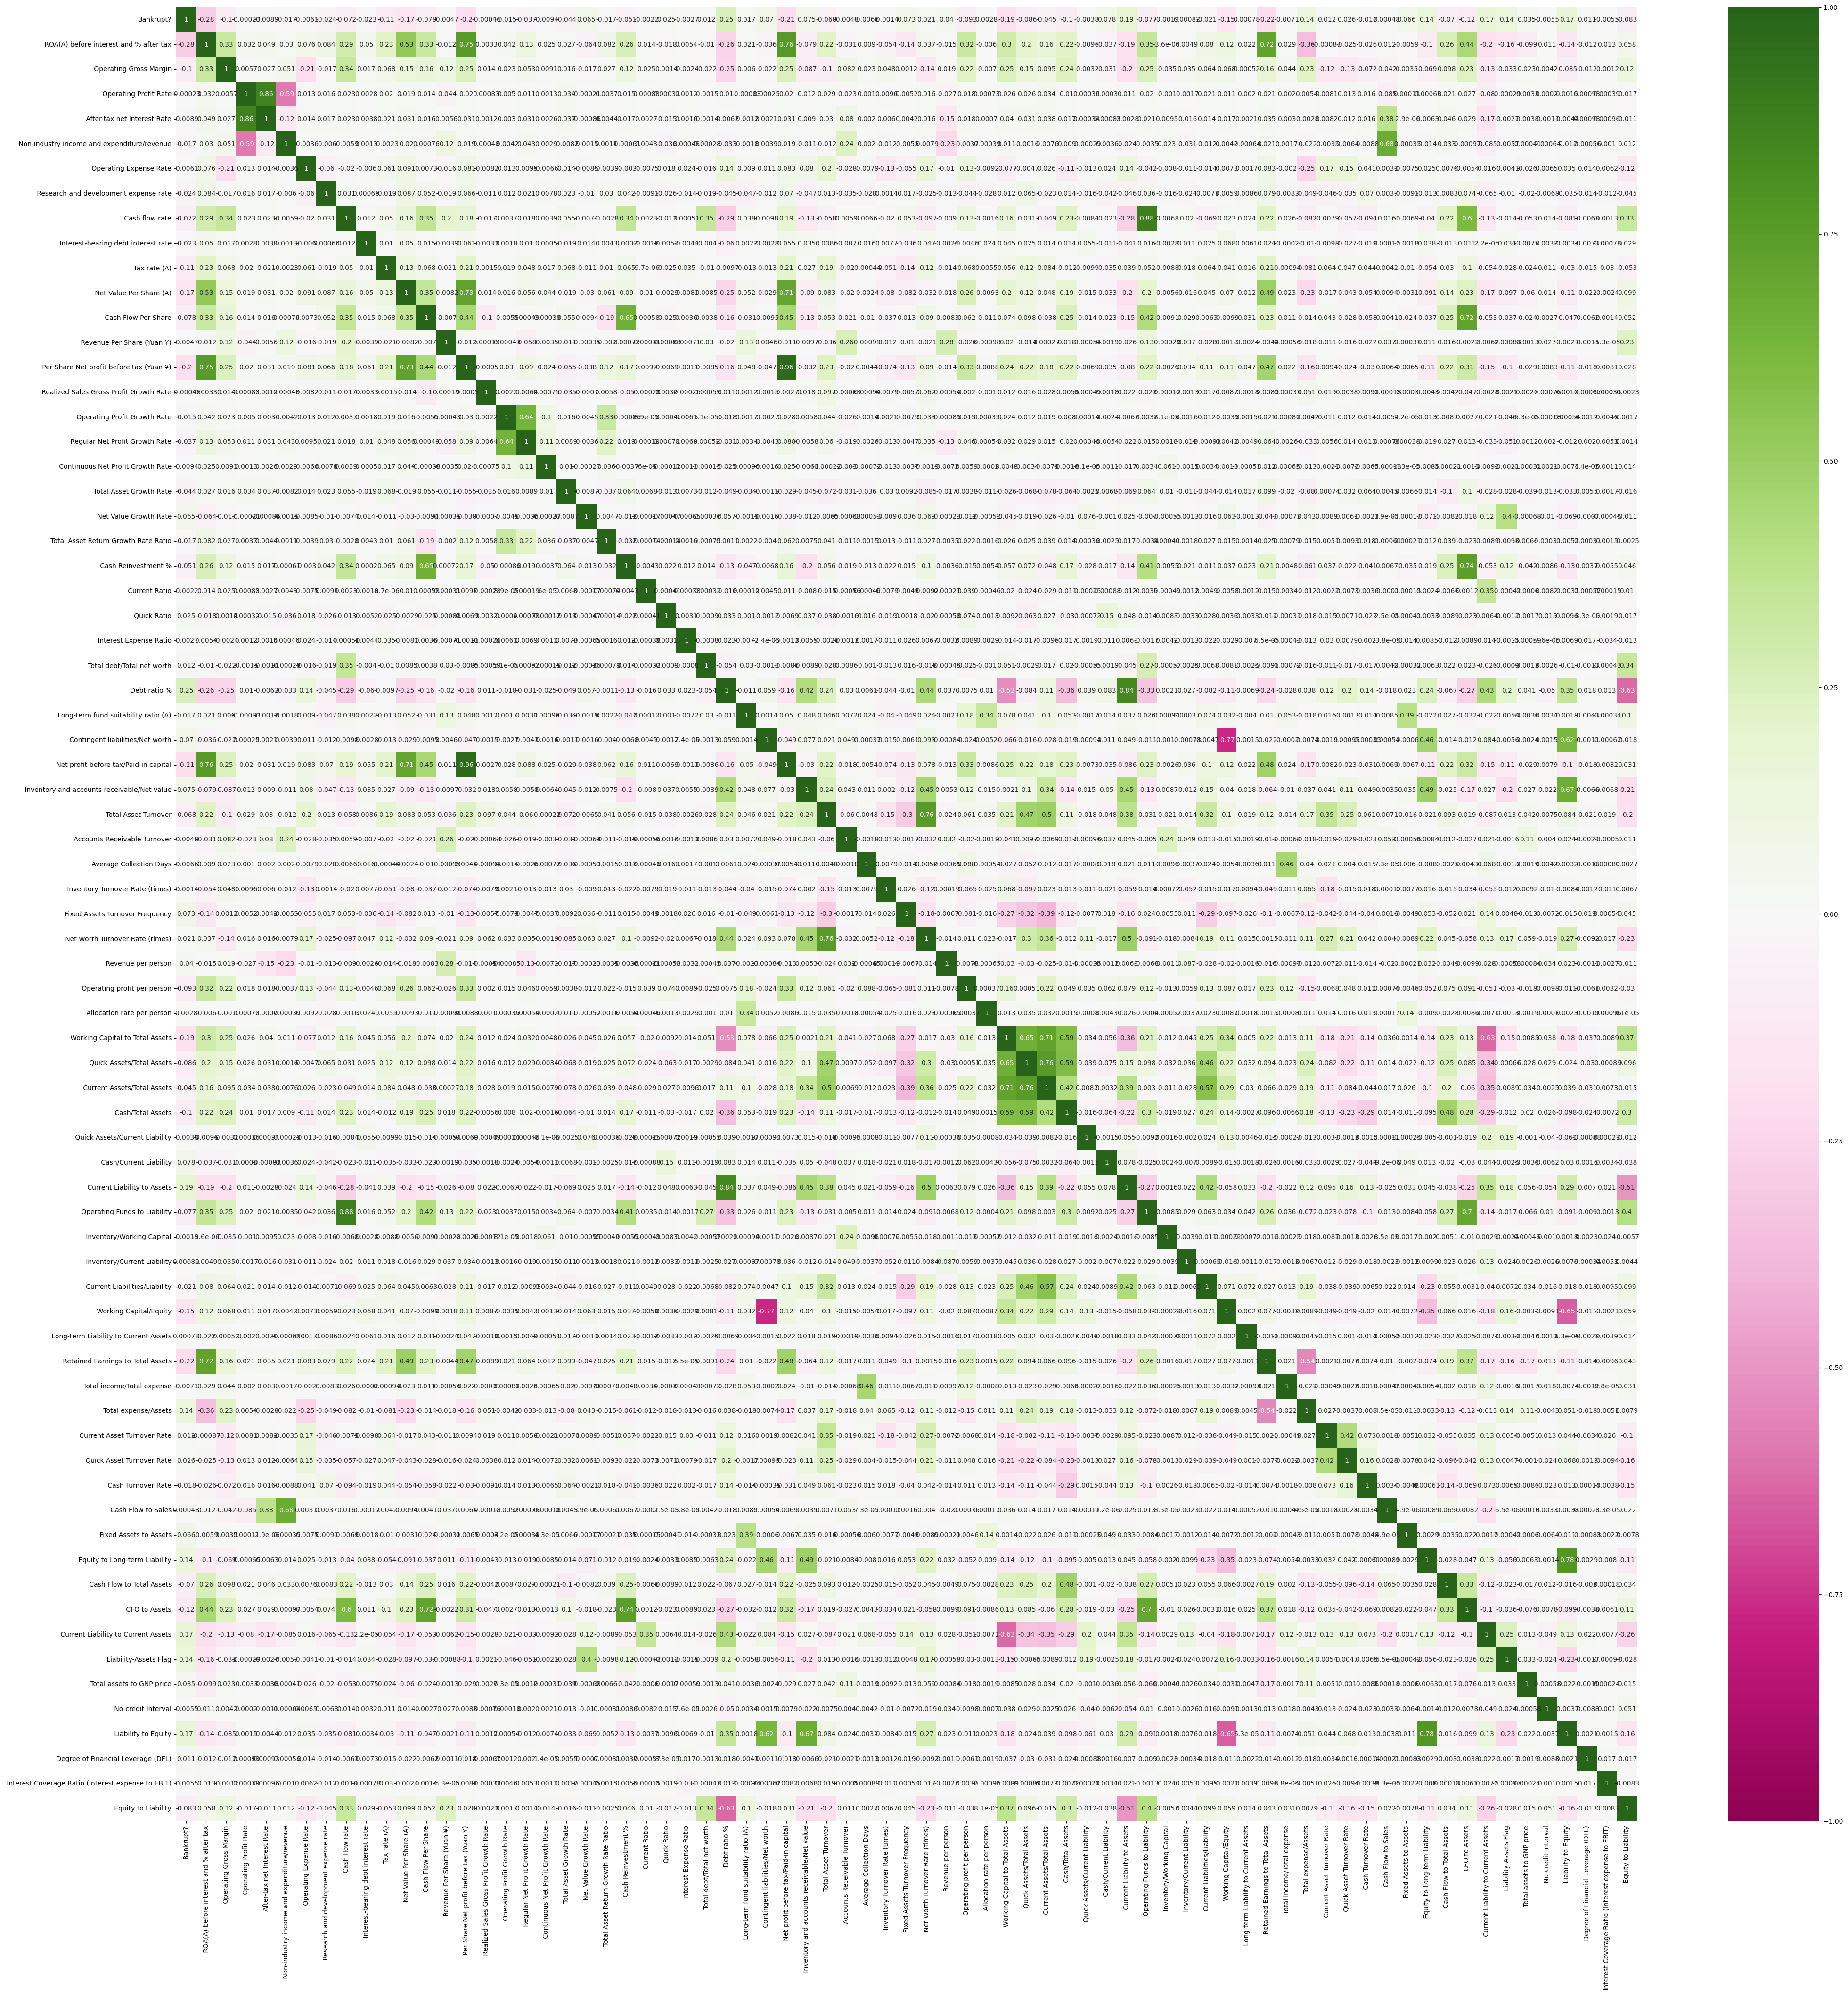

In [28]:
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(df.corr(numeric_only=True),vmin=-1,vmax=1, annot=True, cmap="PiYG");


In [30]:
X = df.drop(columns=["Bankrupt?"])

In [19]:
# Target booleano, columna Bankrupt. 1= True = Bankrupt, 0 = False, no Bankrupt

In [32]:
y = df["Bankrupt?"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5455, 71)
(1364, 71)
(5455,)
(1364,)


In [35]:
model = LogisticRegression(class_weight="balanced", max_iter=5000)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion matrix:\n", confusion_matrix(y_test, predictions))
print("Report:\n", classification_report(y_test, predictions))

Accuracy: 0.7309384164222874
Confusion matrix:
 [[974 339]
 [ 28  23]]
Report:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84      1313
           1       0.06      0.45      0.11        51

    accuracy                           0.73      1364
   macro avg       0.52      0.60      0.48      1364
weighted avg       0.94      0.73      0.81      1364



In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1311    2]
 [  44    7]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.78      0.14      0.23        51

    accuracy                           0.97      1364
   macro avg       0.87      0.57      0.61      1364
weighted avg       0.96      0.97      0.95      1364



In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight="balanced", max_iter=1000, solver="saga", random_state=42)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.8665689149560117
ROC AUC: 0.8579215387602108
Confusion matrix:
 [[1141  172]
 [  10   41]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      1313
           1       0.19      0.80      0.31        51

    accuracy                           0.87      1364
   macro avg       0.59      0.84      0.62      1364
weighted avg       0.96      0.87      0.90      1364



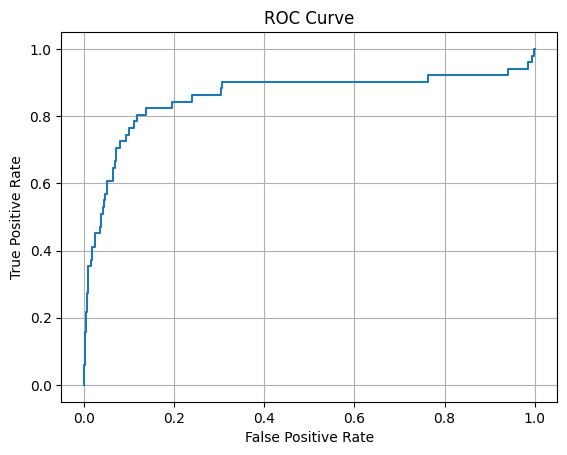

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

y_proba = pipeline.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.show()


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier


# Definir modelos y sus grids
grids = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5, None]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.5, 1.0]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    }
}

# Resultados
resultados_grid = []

for nombre, objeto in grids.items():
    grid = GridSearchCV(objeto["model"], objeto["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    
    resultados_grid.append({
        "Modelo": nombre,
        "Mejor Accuracy": grid.best_score_,
        "Mejores Parámetros": grid.best_params_
    })

# DataFrame resumen
df_resultados_grid = pd.DataFrame(resultados_grid).sort_values(by="Mejor Accuracy", ascending=False)
df_resultados_grid


,Modelo,Mejor Accuracy,Mejores Parámetros
0,RandomForest,0.972319,"{'max_depth': None, 'n_estimators': 50}"
2,GradientBoosting,0.971769,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
3,XGBoost,0.971402,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
1,AdaBoost,0.969386,"{'learning_rate': 0.5, 'n_estimators': 50}"


In [47]:
print(df_resultados_grid.to_string(index=False))

          Modelo  Mejor Accuracy                                          Mejores Parámetros
    RandomForest        0.972319                     {'max_depth': None, 'n_estimators': 50}
GradientBoosting        0.971769 {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
         XGBoost        0.971402  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
        AdaBoost        0.969386                  {'learning_rate': 0.5, 'n_estimators': 50}


In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced", n_estimators=50, random_state=42, n_jobs=-1, max_depth= None,)
rf.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1311    2]
 [  44    7]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.78      0.14      0.23        51

    accuracy                           0.97      1364
   macro avg       0.87      0.57      0.61      1364
weighted avg       0.96      0.97      0.95      1364



In [57]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Calculamos el peso de la clase para el desbalance
scale_pos_weight = np.bincount(y_train)[0] / np.bincount(y_train)[1]  # negativos / positivos

model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Puedes usar estos parámetros como punto de partida o meterlos en un GridSearchCV
params = {
    'learning_rate': [0.1],
    'max_depth': [3],
    'n_estimators': [50]
}

grid = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Evaluamos
y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Confusion Matrix:
 [[1211  109]
 [   9   35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1320
           1       0.24      0.80      0.37        44

    accuracy                           0.91      1364
   macro avg       0.62      0.86      0.66      1364
weighted avg       0.97      0.91      0.93      1364

ROC AUC: 0.9510847107438016


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:15:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [63]:
y_train_bal.value_counts()

Bankrupt?
0    5279
1    5279
Name: count, dtype: int64

In [64]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train_bal, y_train_bal)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.45      0.55      0.49        44

    accuracy                           0.96      1364
   macro avg       0.72      0.76      0.74      1364
weighted avg       0.97      0.96      0.97      1364



In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Entrenamos con el dataset balanceado
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1  # para aprovechar todos los núcleos del procesador
)

rf.fit(X_train_bal, y_train_bal)

# Evaluamos en el conjunto de test original
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[1287   33]
 [  17   27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.45      0.61      0.52        44

    accuracy                           0.96      1364
   macro avg       0.72      0.79      0.75      1364
weighted avg       0.97      0.96      0.97      1364

ROC AUC: 0.9428891184573003


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier


# Definir modelos y sus grids
grids = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5, None]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.5, 1.0]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    }
}

# Resultados
resultados_grid = []

for nombre, objeto in grids.items():
    grid = GridSearchCV(objeto["model"], objeto["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_bal, y_train_bal)
    
    resultados_grid.append({
        "Modelo": nombre,
        "Mejor Accuracy": grid.best_score_,
        "Mejores Parámetros": grid.best_params_
    })

# DataFrame resumen
df_resultados_grid = pd.DataFrame(resultados_grid).sort_values(by="Mejor Accuracy", ascending=False)
df_resultados_grid


,Modelo,Mejor Accuracy,Mejores Parámetros
0,RandomForest,0.982478,"{'max_depth': None, 'n_estimators': 100}"
3,XGBoost,0.982289,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
2,GradientBoosting,0.979542,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1,AdaBoost,0.942603,"{'learning_rate': 1.0, 'n_estimators': 100}"


In [67]:
print(df_resultados_grid.to_string(index=False))

          Modelo  Mejor Accuracy                                          Mejores Parámetros
    RandomForest        0.982478                    {'max_depth': None, 'n_estimators': 100}
         XGBoost        0.982289 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
GradientBoosting        0.979542 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
        AdaBoost        0.942603                 {'learning_rate': 1.0, 'n_estimators': 100}


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Entrenamos con el dataset balanceado
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    
    n_jobs=-1  # para aprovechar todos los núcleos del procesador
)

rf.fit(X_train_bal, y_train_bal)

# Evaluamos en el conjunto de test original
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[1287   33]
 [  17   27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.45      0.61      0.52        44

    accuracy                           0.96      1364
   macro avg       0.72      0.79      0.75      1364
weighted avg       0.97      0.96      0.97      1364

ROC AUC: 0.9428891184573003


In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(0.1, 0.9, 17)  # valores entre 0.1 y 0.9
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for t in thresholds:
    precisiones = []
    recalls = []
    f1s = []
    
    for train_idx, val_idx in kf.split(X_train_bal, y_train_bal):
        X_train_cv, X_val_cv = X_train_bal.iloc[train_idx], X_train_bal.iloc[val_idx]
        y_train_cv, y_val_cv = y_train_bal.iloc[train_idx], y_train_bal.iloc[val_idx]

        model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
        model.fit(X_train_cv, y_train_cv)
        y_proba = model.predict_proba(X_val_cv)[:, 1]
        y_pred = (y_proba >= t).astype(int)

        precisiones.append(precision_score(y_val_cv, y_pred))
        recalls.append(recall_score(y_val_cv, y_pred))
        f1s.append(f1_score(y_val_cv, y_pred))

    results.append({
        'Threshold': t,
        'Precision': np.mean(precisiones),
        'Recall': np.mean(recalls),
        'F1': np.mean(f1s)
    })

df_thresholds = pd.DataFrame(results)


In [74]:
df_thresholds

,Threshold,Precision,Recall,F1
0,0.10,0.821937,1.000000,0.902254
1,0.15,0.863171,0.999810,0.926467
2,0.20,0.883852,0.999810,0.938246
3,0.25,0.904109,0.999621,0.949456
4,0.30,0.925776,0.999053,0.961012
5,0.35,0.937776,0.999053,0.967443
6,0.40,0.949615,0.998863,0.973607
7,0.45,0.960317,0.997916,0.978741
8,0.50,0.966779,0.996591,0.981447
9,0.55,0.973898,0.995454,0.984548


In [93]:
# Generar probabilidades de clase 1 (quiebra)
y_proba = rf.predict_proba(X_test)[:, 1]

# Aplicar threshold personalizado
umbral = 0.5
y_pred_custom = (y_proba >= umbral).astype(int)

# Evaluar el resultado con el threshold elegido
from sklearn.metrics import classification_report, confusion_matrix

print(f"Threshold aplicado: {umbral}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom, target_names=["No Quiebra", "Quiebra"]))



Threshold aplicado: 0.5

Confusion Matrix:
 [[1287   33]
 [  17   27]]

Classification Report:
               precision    recall  f1-score   support

  No Quiebra       0.99      0.97      0.98      1320
     Quiebra       0.45      0.61      0.52        44

    accuracy                           0.96      1364
   macro avg       0.72      0.79      0.75      1364
weighted avg       0.97      0.96      0.97      1364



In [104]:
pares = find_highly_correlated_pairs(df, threshold=0.8)
for var1, var2, corr in pares:
    print(f"{var1} <--> {var2} | Correlación: {corr:.3f}")


 Per Share Net profit before tax (Yuan ¥) <-->  Net profit before tax/Paid-in capital | Correlación: 0.963
 Cash flow rate <-->  Operating Funds to Liability | Correlación: 0.881
 Debt ratio % <-->  Current Liability to Assets | Correlación: 0.843


### Entrenamientos sin quitar columnas, mejor resultado con random forest.

In [105]:
df2 = pd.read_csv('../data/raw/data.csv')

In [106]:
X2 = df2.drop(columns=["Bankrupt?"])
y2= df2["Bankrupt?"]

In [107]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=10)

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Entrenamos con el dataset balanceado
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    
    n_jobs=-1  # para aprovechar todos los núcleos del procesador
)

rf.fit(X_train2, y_train2)

# Evaluamos en el conjunto de test original
y_pred = rf.predict(X_test2)
y_proba = rf.predict_proba(X_test2)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred))
print("\nClassification Report:\n", classification_report(y_test2, y_pred))
print("ROC AUC:", roc_auc_score(y_test2, y_proba))

Confusion Matrix:
 [[1312    1]
 [  42    9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.90      0.18      0.30        51

    accuracy                           0.97      1364
   macro avg       0.93      0.59      0.64      1364
weighted avg       0.97      0.97      0.96      1364

ROC AUC: 0.9478741991846243


In [109]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal2, y_train_bal2 = smote.fit_resample(X_train2, y_train2)

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Entrenamos con el dataset balanceado
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    
    n_jobs=-1  # para aprovechar todos los núcleos del procesador
)

rf.fit(X_train_bal2, y_train_bal2)

# Evaluamos en el conjunto de test original
y_pred = rf.predict(X_test2)
y_proba = rf.predict_proba(X_test2)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred))
print("\nClassification Report:\n", classification_report(y_test2, y_pred))
print("ROC AUC:", roc_auc_score(y_test2, y_proba))

Confusion Matrix:
 [[1280   33]
 [  18   33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1313
           1       0.50      0.65      0.56        51

    accuracy                           0.96      1364
   macro avg       0.74      0.81      0.77      1364
weighted avg       0.97      0.96      0.96      1364

ROC AUC: 0.9531980347356003


In [115]:
# Entrenar una sola vez con todos los datos de entrenamiento
modelo_final = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_final.fit(X_train_bal2, y_train_bal2)

# Calcular las probabilidades en el test
y_proba_test = modelo_final.predict_proba(X_test2)[:, 1]

# Probar varios thresholds
thresholds = np.linspace(0.1, 0.9, 17)

for t in thresholds:
    y_pred = (y_proba_test >= t).astype(int)
    print(f"\nThreshold: {t:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test2, y_pred))
    print("Classification Report:")
    print(classification_report(y_test2, y_pred, target_names=["No Quiebra", "Quiebra"]))



Threshold: 0.10
Confusion Matrix:
[[1063  250]
 [   4   47]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       1.00      0.81      0.89      1313
     Quiebra       0.16      0.92      0.27        51

    accuracy                           0.81      1364
   macro avg       0.58      0.87      0.58      1364
weighted avg       0.96      0.81      0.87      1364


Threshold: 0.15
Confusion Matrix:
[[1130  183]
 [   7   44]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.86      0.92      1313
     Quiebra       0.19      0.86      0.32        51

    accuracy                           0.86      1364
   macro avg       0.59      0.86      0.62      1364
weighted avg       0.96      0.86      0.90      1364


Threshold: 0.20
Confusion Matrix:
[[1170  143]
 [   8   43]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.89   

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10, 20, 30, 40],
    "n_estimators": [50, 100, 150, 200]
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1),
    param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train2, y_train2)




GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 5, 10, 20, 30, 40],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc')

In [120]:
print("✅ Mejores parámetros encontrados:")
print(grid.best_params_)

✅ Mejores parámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Entrenamos con el dataset balanceado
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    min_samples_leaf=10,
    min_samples_split=2,
    
    n_jobs=-1  # para aprovechar todos los núcleos del procesador
)

rf.fit(X_train_bal2, y_train_bal2)

# Evaluamos en el conjunto de test original
y_pred = rf.predict(X_test2)
y_proba = rf.predict_proba(X_test2)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred))
print("\nClassification Report:\n", classification_report(y_test2, y_pred))
print("ROC AUC:", roc_auc_score(y_test2, y_proba))

Confusion Matrix:
 [[1235   78]
 [  13   38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      1313
           1       0.33      0.75      0.46        51

    accuracy                           0.93      1364
   macro avg       0.66      0.84      0.71      1364
weighted avg       0.96      0.93      0.95      1364

ROC AUC: 0.9573047802517809


In [125]:
rf

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [123]:


# Calcular las probabilidades en el test
y_proba_test = rf.predict_proba(X_test2)[:, 1]

# Probar varios thresholds
thresholds = np.linspace(0.1, 0.9, 17)

for t in thresholds:
    y_pred = (y_proba_test >= t).astype(int)
    print(f"\nThreshold: {t:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test2, y_pred))
    print("Classification Report:")
    print(classification_report(y_test2, y_pred, target_names=["No Quiebra", "Quiebra"]))


Threshold: 0.10
Confusion Matrix:
[[997 316]
 [  1  50]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       1.00      0.76      0.86      1313
     Quiebra       0.14      0.98      0.24        51

    accuracy                           0.77      1364
   macro avg       0.57      0.87      0.55      1364
weighted avg       0.97      0.77      0.84      1364


Threshold: 0.15
Confusion Matrix:
[[1063  250]
 [   4   47]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       1.00      0.81      0.89      1313
     Quiebra       0.16      0.92      0.27        51

    accuracy                           0.81      1364
   macro avg       0.58      0.87      0.58      1364
weighted avg       0.96      0.81      0.87      1364


Threshold: 0.20
Confusion Matrix:
[[1118  195]
 [   6   45]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.85      0

In [ ]:
# mejor resultado abajo, modelo final

In [126]:
umbral = 0.8
y_pred = (y_proba >= umbral).astype(int)
print("Threshold aplicado:", umbral)
print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred))
print("\nClassification Report:\n", classification_report(y_test2, y_pred))
print("ROC AUC:", roc_auc_score(y_test2, y_proba))


Threshold aplicado: 0.8
Confusion Matrix:
 [[1302   11]
 [  19   32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1313
           1       0.74      0.63      0.68        51

    accuracy                           0.98      1364
   macro avg       0.86      0.81      0.83      1364
weighted avg       0.98      0.98      0.98      1364

ROC AUC: 0.9573047802517809


In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier


# Definir modelos y sus grids
grids = {
    
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100,200],
            "learning_rate": [0.5, 1.0,1.5]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100,200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5,10]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [50, 100,200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5,10]
        }
    }
}

# Resultados
resultados_grid = []

for nombre, objeto in grids.items():
    grid = GridSearchCV(objeto["model"], objeto["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_bal2, y_train_bal2)
    
    resultados_grid.append({
        "Modelo": nombre,
        "Mejor Accuracy": grid.best_score_,
        "Mejores Parámetros": grid.best_params_
    })

# DataFrame resumen
df_resultados_grid = pd.DataFrame(resultados_grid).sort_values(by="Mejor Accuracy", ascending=False)
df_resultados_grid


,Modelo,Mejor Accuracy,Mejores Parámetros
2,XGBoost,0.986001,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1,GradientBoosting,0.984298,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
0,AdaBoost,0.958759,"{'learning_rate': 1.5, 'n_estimators': 200}"


In [129]:
print(df_resultados_grid.to_string(index=False))

          Modelo  Mejor Accuracy                                           Mejores Parámetros
         XGBoost        0.986001  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
GradientBoosting        0.984298 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
        AdaBoost        0.958759                  {'learning_rate': 1.5, 'n_estimators': 200}


In [130]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators=200, learning_rate=1.5, random_state=42)
ada.fit(X_train_bal2, y_train_bal2)

# GradientBoosting
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
gb.fit(X_train_bal2, y_train_bal2)

# XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, eval_metric='logloss', random_state=42)
xgb.fit(X_train_bal2, y_train_bal2)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [132]:
from sklearn.metrics import confusion_matrix, classification_report

modelos = {
    "AdaBoost": ada,
    "GradientBoosting": gb,
    "XGBoost": xgb
}

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test2)

    print(f"\n🔍 Confusion Matrix - {nombre} (Threshold=0.5 por defecto)")
    print(confusion_matrix(y_test2, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test2, y_pred, target_names=["No Quiebra", "Quiebra"]))




🔍 Confusion Matrix - AdaBoost (Threshold=0.5 por defecto)
[[1252   61]
 [  18   33]]

Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.95      0.97      1313
     Quiebra       0.35      0.65      0.46        51

    accuracy                           0.94      1364
   macro avg       0.67      0.80      0.71      1364
weighted avg       0.96      0.94      0.95      1364


🔍 Confusion Matrix - GradientBoosting (Threshold=0.5 por defecto)
[[1290   23]
 [  21   30]]

Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.98      0.98      0.98      1313
     Quiebra       0.57      0.59      0.58        51

    accuracy                           0.97      1364
   macro avg       0.78      0.79      0.78      1364
weighted avg       0.97      0.97      0.97      1364


🔍 Confusion Matrix - XGBoost (Threshold=0.5 por defecto)
[[1288   25]
 [  17   34]]

Classification Report:
         

In [133]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    learning_rate=0.1,        # fijamos los mejores encontrados
    max_depth=5,
    n_estimators=200,
    use_label_encoder=False
)

param_grid_fino = {
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'min_child_weight': [1, 3],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [1, 2]
}

grid_fino = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_fino,
    cv=5,
    scoring='f1',  # o 'roc_auc', o 'recall'
    verbose=1,
    n_jobs=-1
)

grid_fino.fit(X_train_bal2, y_train_bal2)

print("✅ Mejores parámetros finos:", grid_fino.best_params_)
print("📈 Mejor f1-score:", grid_fino.best_score_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:21:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Mejores parámetros finos: {'colsample_bytree': 1.0, 'gamma': 0, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 0.8}
📈 Mejor f1-score: 0.9869164539683132


In [134]:
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, eval_metric='logloss', random_state=42, subsample= 0.8,
    colsample_bytree= 1.0,
    gamma= 0,
    min_child_weight= 1,
    reg_alpha= 0,
    reg_lambda= 2)
xgb.fit(X_train_bal2, y_train_bal2)

    

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [135]:
from sklearn.metrics import confusion_matrix, classification_report

modelos = {
    "XGBoost": xgb
}

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test2)

    print(f"\n🔍 Confusion Matrix - {nombre} (Threshold=0.5 por defecto)")
    print(confusion_matrix(y_test2, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test2, y_pred, target_names=["No Quiebra", "Quiebra"]))


🔍 Confusion Matrix - XGBoost (Threshold=0.5 por defecto)
[[1292   21]
 [  18   33]]

Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.98      0.99      1313
     Quiebra       0.61      0.65      0.63        51

    accuracy                           0.97      1364
   macro avg       0.80      0.82      0.81      1364
weighted avg       0.97      0.97      0.97      1364



In [136]:

# Calcular las probabilidades en el test
y_proba_test = xgb.predict_proba(X_test2)[:, 1]

# Probar varios thresholds
thresholds = np.linspace(0.1, 0.9, 17)

for t in thresholds:
    y_pred = (y_proba_test >= t).astype(int)
    print(f"\nThreshold: {t:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test2, y_pred))
    print("Classification Report:")
    print(classification_report(y_test2, y_pred, target_names=["No Quiebra", "Quiebra"]))


Threshold: 0.10
Confusion Matrix:
[[1253   60]
 [  13   38]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.95      0.97      1313
     Quiebra       0.39      0.75      0.51        51

    accuracy                           0.95      1364
   macro avg       0.69      0.85      0.74      1364
weighted avg       0.97      0.95      0.95      1364


Threshold: 0.15
Confusion Matrix:
[[1261   52]
 [  15   36]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.96      0.97      1313
     Quiebra       0.41      0.71      0.52        51

    accuracy                           0.95      1364
   macro avg       0.70      0.83      0.75      1364
weighted avg       0.97      0.95      0.96      1364


Threshold: 0.20
Confusion Matrix:
[[1267   46]
 [  15   36]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.96   